### Part 1. Algorithmic Implementation - Steepest Descent

In [1]:
# Install libraries
%matplotlib inline
import numpy as np
from sympy import *
from scipy import stats
from scipy.optimize import line_search
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random
import time

### 1) func = x1^2 + x2^2 + x3^2      and     x0 = 1,1,1

In [2]:
################################################################################################
#                                        Trivariate Calculation                                #
################################################################################################

# Start at Example:
#x = np.matrix('1;1;1')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2, x3 = symbols('x1:4')
fn = x1**2 + x2**2 + x3**2

# Lambdify objective function
f = lambdify('x1, x2, x3', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2) 
fnDiffx3 = fn.diff(x3) 
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2], [fnDiffx3]])

# Lambdify
fprime = lambdify('x1, x2, x3', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2) ; fnHessx13 = diff(diff(fn, x1),x3)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) ; fnHessx23 = diff(diff(fn, x2),x3)
fnHessx31 = diff(diff(fn, x3),x1) ; fnHessx32 = diff(diff(fn, x3),x2) ; fnHessx33 = diff(diff(fn, x3),x3) 
fnHess = Matrix([[fnHessx11, fnHessx12, fnHessx13], [fnHessx21, fnHessx22, fnHessx23], [fnHessx31, fnHessx32, fnHessx33]])

# Lambdify
fHess = lambdify('x1, x2, x3', fnHess)

# Calculate Example
#f(x.item((0,0)) , x.item((1,0)) , x.item((2,0)))
#np.asmatrix(fprime(x.item((0,0)) , x.item((1,0)) , x.item((2,0))))
#np.asmatrix(fHess(x.item((0,0)) , x.item((1,0)) , x.item((2,0))))

In [3]:
# Start at
x = np.matrix('1;1;1')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = 0.00001
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)) , x.item((2,0)))]
Q = np.asmatrix(fHess(x.item((0,0)) , x.item((1,0)) , x.item((2,0))))

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0))))

# Calculate runtime
starttime = time.time()

# Formula for gradient descent
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0)) , xold.item((2,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * fprimeVal
    
    # Calculate step size
    step = (-1 * np.transpose(direction) * fprimeVal)/ (np.transpose(direction) * Q * direction)
    
    # Calculate new x
    xnew = xold + step.item((0,0)) * direction
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)    
        print("Step Length: ",step.item((0,0)))  
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[1]
 [1]
 [1]]


Iteration:  1
Direction:  [[-2]
 [-2]
 [-2]]
Step Length:  0.5
New Value:  [[ 0.]
 [ 0.]
 [ 0.]]




Local minimum occurs at: [[ 0.]
 [ 0.]
 [ 0.]]
Number of steps: 1
runtime:  0.010007143020629883


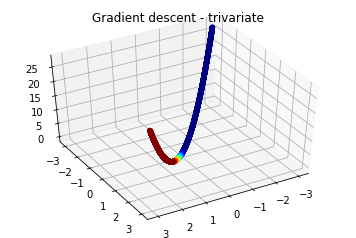

In [4]:
# create the figure, add a 3d axis, set the viewing angle
x = np.linspace(-3,3,10000)
y = np.linspace(-3,3,10000)
z = np.linspace(-3,3,10000)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45,60)

#ax.scatter(x, y, f(x,y,z), c='b', marker='o')
ax.scatter(x, y, f(x,y,z), facecolors=plt.cm.jet(z))
#ax.scatter(x, y, z, facecolors=plt.cm.jet(f(x,y,z)))
plt.title("Gradient descent - trivariate")
plt.show()

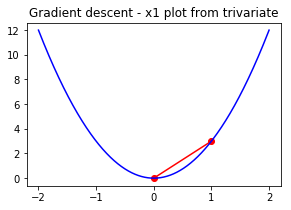

In [5]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)
z = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y,z), c="b")
plt.title("Gradient descent - x1 plot from trivariate")

### 2) func = x1^2 + 2*x2^2 - 2*x1*x2 - 2*x2  and x0 = 0,0

In [6]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('0;0')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')
fn = x1**2 + 2*x2**2 - 2*x1*x2 - 2*x2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Calculate Example
#x = np.matrix('0;0')
#f(x.item((0,0)) , x.item((1,0)))
#np.asmatrix(fprime(x.item((0,0)) , x.item((1,0))))
#np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))

In [7]:
# Start at
x = np.matrix('0;0')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = 0.00001
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]
Q = np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for gradint descent
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * fprimeVal
    
    # Calculate step size
    step = (-1 * np.transpose(direction) * fprimeVal)/ (np.transpose(direction) * Q * direction)
    
    # Calculate new x
    xnew = xold + step.item((0,0)) * direction
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)    
        print("Step Length: ",step.item((0,0)))  
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[0]
 [0]]


Iteration:  1
Direction:  [[0]
 [2]]
Step Length:  0.25
New Value:  [[ 0. ]
 [ 0.5]]




Iteration:  2
Direction:  [[ 1.]
 [ 0.]]
Step Length:  0.5
New Value:  [[ 0.5]
 [ 0.5]]




Iteration:  3
Direction:  [[ 0.]
 [ 1.]]
Step Length:  0.25
New Value:  [[ 0.5 ]
 [ 0.75]]




Iteration:  4
Direction:  [[ 0.5]
 [ 0. ]]
Step Length:  0.5
New Value:  [[ 0.75]
 [ 0.75]]




Iteration:  5
Direction:  [[ 0. ]
 [ 0.5]]
Step Length:  0.25
New Value:  [[ 0.75 ]
 [ 0.875]]




Iteration:  6
Direction:  [[ 0.25]
 [ 0.  ]]
Step Length:  0.5
New Value:  [[ 0.875]
 [ 0.875]]




Iteration:  7
Direction:  [[ 0.  ]
 [ 0.25]]
Step Length:  0.25
New Value:  [[ 0.875 ]
 [ 0.9375]]




Iteration:  8
Direction:  [[ 0.125]
 [ 0.   ]]
Step Length:  0.5
New Value:  [[ 0.9375]
 [ 0.9375]]




Iteration:  9
Direction:  [[ 0.   ]
 [ 0.125]]
Step Length:  0.25
New Value:  [[ 0.9375 ]
 [ 0.96875]]




Iteration:  10
Direction:  [[ 0.0625]
 [ 0.    ]]
Step Length:  0.5
New Val

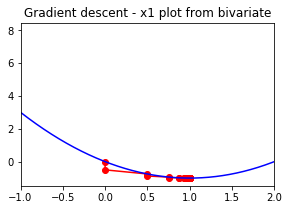

In [8]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.xlim([-1,2])
plt.title("Gradient descent - x1 plot from bivariate")

### 3) func = 100*(x2 - x1**2)^2 + (1-x1)^2 and x0 = -1.2,1
#### Notice this is a polynomial problem. Finding the Step size will be challenging as we cannot use Q anymore

In [9]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('-1.2;1')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')
fn = 100*(x2 - x1**2)**2 + (1-x1)**2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Define function to execute optimizes step size using line search
# Hardcoded due to shortage of time. Not good!!!!
def opt_func(x):
    return (-x[0] + 1)**2 + 100*(-x[0]**2 + x[1])**2

def grad(x):
    return [-400*x[0]*(-x[0]**2 + x[1]) + 2*x[0] - 2, -200*x[0]**2 + 200*x[1]]

In [10]:
# Start at
x = np.matrix('-1.2;1')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = 0.00001
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for gradint descent
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * fprimeVal
    
    # Calculate step size
    # Use scipy line search function to find ideal step size.
    step = line_search(opt_func, grad, np.squeeze(np.asarray(xold)), np.squeeze(np.asarray(direction)))[0]
    
    # Calculate new x
    xnew = xold + step * direction
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)    
        print("Step Length: ",step)  
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[-1.2]
 [ 1. ]]


Iteration:  1
Direction:  [[ 215.6]
 [  88. ]]
Step Length:  0.000938310275875
New Value:  [[-0.9977003]
 [ 1.0825713]]




Iteration:  2
Direction:  [[-30.79058049]
 [-17.43308133]]
Step Length:  0.000998143648971
New Value:  [[-1.02843373]
 [ 1.06517058]]




Iteration:  3
Direction:  [[ 0.97376536]
 [-1.49893086]]
Step Length:  0.593980727947
New Value:  [[-0.45003587]
 [ 0.17483454]]




Iteration:  4
Direction:  [[ 7.88606202]
 [ 5.53954766]]
Step Length:  0.00301678950651
New Value:  [[-0.42624528]
 [ 0.19154619]]




Iteration:  5
Direction:  [[ 1.17118213]
 [-1.97223114]]
Step Length:  0.026089472178
New Value:  [[-0.39568976]
 [ 0.14009172]]




Iteration:  6
Direction:  [[ 5.39955403]
 [ 3.29573167]]
Step Length:  0.00470389849101
New Value:  [[-0.3702908 ]
 [ 0.15559451]]




Iteration:  7
Direction:  [[  3.50548160e-03]
 [ -3.69584677e+00]]
Step Length:  0.00500703535133
New Value:  [[-0.37027325]
 [ 0.13708928]]




Iteration: 

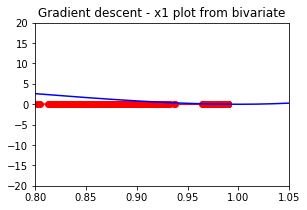

In [11]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.ylim([-20,20])
plt.xlim([0.8,1.05])
plt.title("Gradient descent - x1 plot from bivariate")

### 4) func = (x1+x2)^4 + x2^2 and x0 = 2,-2
#### Notice this is a polynomial problem. Finding the Step size will be challenging as we cannot use Q anymore

In [12]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('2,-2')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')
fn = (x1+x2)**4 + x2**2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Define function to execute optimizes step size using line search
# Hardcoded due to shortage of time. Not good!!!!
def opt_func(x):
    return x[1]**2 + (x[0] + x[1])**4

def grad(x):
    return [4*(x[0] + x[1])**3, 2*x[1] + 4*(x[0] + x[1])**3]

In [13]:
# Here step size will be calculated in a different way.
# Start at
x = np.matrix('2;-2')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = 0.00001
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for gradint descent
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * fprimeVal
    
    # Calculate step size
    # Use scipy line search function to find ideal step size.
    step = line_search(opt_func, grad, np.squeeze(np.asarray(xold)), np.squeeze(np.asarray(direction)))[0]
    
    # Calculate new x
    xnew = xold + step * direction
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)    
        print("Step Length: ",step)  
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[ 2]
 [-2]]


Iteration:  1
Direction:  [[0]
 [4]]
Step Length:  0.25
New Value:  [[ 2.]
 [-1.]]




Iteration:  2
Direction:  [[-4.]
 [-2.]]
Step Length:  0.145825025619
New Value:  [[ 1.4166999 ]
 [-1.29165005]]




Iteration:  3
Direction:  [[-0.00782185]
 [ 2.57547825]]
Step Length:  0.250751027401
New Value:  [[ 1.41473856]
 [-0.64584623]]




Iteration:  4
Direction:  [[-1.81826246]
 [-0.52656999]]
Step Length:  0.172950315505
New Value:  [[ 1.10026949]
 [-0.73691668]]




Iteration:  5
Direction:  [[-0.19188701]
 [ 1.28194635]]
Step Length:  0.14289782791
New Value:  [[ 1.07284926]
 [-0.55372933]]




Iteration:  6
Direction:  [[-0.55958117]
 [ 0.5478775 ]]
Step Length:  1.0
New Value:  [[ 0.51326809]
 [-0.00585184]]




Iteration:  7
Direction:  [[-0.5225804 ]
 [-0.51087673]]
Step Length:  0.329137207612
New Value:  [[ 0.34126744]
 [-0.17400038]]




Iteration:  8
Direction:  [[-0.01871937]
 [ 0.32928138]]
Step Length:  0.35326216034
New Value:  [[ 0

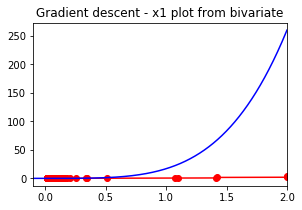

In [14]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.xlim([-0.1,2])
plt.title("Gradient descent - x1 plot from bivariate")

### 5.1) func = (x1-1)^2 + (x2-1)^2 + c*(x1^2 + x2^2 - 0.25)^2 and x0 = 1,-1 at c = 1
#### Notice this is a polynomial problem. Finding the Step size will be challenging as we cannot use Q anymore

In [15]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('2,-2')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')

# at C=1
fn = (x1-1)**2 + (x2-1)**2 + 1*(x1**2 + x2**2 - 0.25)**2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Define function to execute optimizes step size using line search
# Hardcoded due to shortage of time. Not good!!!!
def opt_func(x):
    return (x[0] - 1)**2 + (x[1] - 1)**2 + (x[0]**2 + x[1]**2 - 0.25)**2

def grad(x):
    return [4*x[0]*(x[0]**2 + x[1]**2 - 0.25) + 2*x[0] - 2, 4*x[1]*(x[0]**2 + x[1]**2 - 0.25) + 2*x[1] - 2]

In [16]:
# Here step size will be calculated in a different way.
# Start at
x = np.matrix('1;-1')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = 0.00001
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for gradint descent
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * fprimeVal
    
    # Calculate step size
    # Use scipy line search function to find ideal step size.
    step = line_search(opt_func, grad, np.squeeze(np.asarray(xold)), np.squeeze(np.asarray(direction)))[0]
    
    # Calculate new x
    xnew = xold + step * direction
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)    
        print("Step Length: ",step)  
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[ 1]
 [-1]]


Iteration:  1
Direction:  [[ -7.]
 [ 11.]]
Step Length:  0.159187734115
New Value:  [[-0.11431414]
 [ 0.75106508]]




Iteration:  2
Direction:  [[ 2.37822729]
 [-0.48502339]]
Step Length:  0.290229021127
New Value:  [[ 0.57591644]
 [ 0.61029721]]




Iteration:  3
Direction:  [[-0.19802525]
 [-0.32924187]]
Step Length:  0.143495846173
New Value:  [[ 0.54750064]
 [ 0.56305237]]




Iteration:  4
Direction:  [[ 0.1017388 ]
 [ 0.04781877]]
Step Length:  0.117990112221
New Value:  [[ 0.55950481]
 [ 0.56869451]]




Iteration:  5
Direction:  [[ 0.01608751]
 [-0.01649767]]
Step Length:  0.282004897275
New Value:  [[ 0.56404157]
 [ 0.56404209]]




Iteration:  6
Direction:  [[ 0.00039059]
 [ 0.00038874]]
Step Length:  0.115755144002
New Value:  [[ 0.56408678]
 [ 0.56408709]]




Local minimum occurs at: [[ 0.56408678]
 [ 0.56408709]]
Number of steps: 6
runtime:  0.033023834228515625


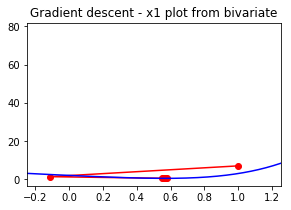

In [17]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.xlim([-0.25,1.25])
plt.title("Gradient descent - x1 plot from bivariate")

### 5.2) func = (x1-1)^2 + (x2-1)^2 + c*(x1^2 + x2^2 - 0.25)^2 and x0 = 1,-1 at c = 10
#### Notice this is a polynomial problem. Finding the Step size will be challenging as we cannot use Q anymore

In [18]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('2,-2')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')

# at C=10
fn = (x1-1)**2 + (x2-1)**2 + 10*(x1**2 + x2**2 - 0.25)**2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Define function to execute optimizes step size using line search
# Hardcoded due to shortage of time. Not good!!!!
def opt_func(x):
    return (x[0] - 1)**2 + (x[1] - 1)**2 + 10*(x[0]**2 + x[1]**2 - 0.25)**2

def grad(x):
    return [40*x[0]*(x[0]**2 + x[1]**2 - 0.25) + 2*x[0] - 2, 40*x[1]*(x[0]**2 + x[1]**2 - 0.25) + 2*x[1] - 2]

In [19]:
# Here step size will be calculated in a different way.
# Start at
x = np.matrix('1;-1')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = 0.00001
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for gradint descent
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * fprimeVal
    
    # Calculate step size
    # Use scipy line search function to find ideal step size.
    step = line_search(opt_func, grad, np.squeeze(np.asarray(xold)), np.squeeze(np.asarray(direction)))[0]
    
    # Calculate new x
    xnew = xold + step * direction
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)    
        print("Step Length: ",step)  
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[ 1]
 [-1]]


Iteration:  1
Direction:  [[-70.]
 [ 74.]]
Step Length:  0.0192008194204
New Value:  [[-0.34405736]
 [ 0.42086064]]




Iteration:  2
Direction:  [[ 3.31428731]
 [ 0.3923268 ]]
Step Length:  0.227222964331
New Value:  [[ 0.40902483]
 [ 0.5100063 ]]




Iteration:  3
Direction:  [[-1.72061634]
 [-2.63917501]]
Step Length:  0.0290284258636
New Value:  [[ 0.35907804]
 [ 0.4333952 ]]




Iteration:  4
Direction:  [[ 0.32284066]
 [-0.02427528]]
Step Length:  0.0558949956171
New Value:  [[ 0.37712322]
 [ 0.43203833]]




Iteration:  5
Direction:  [[ 0.05586876]
 [-0.22722753]]
Step Length:  0.114053946468
New Value:  [[ 0.38349527]
 [ 0.40612214]]




Iteration:  6
Direction:  [[ 0.28188263]
 [ 0.18051083]]
Step Length:  0.0314995601843
New Value:  [[ 0.39237445]
 [ 0.41180815]]




Iteration:  7
Direction:  [[ 0.0609849]
 [-0.0350515]]
Step Length:  0.137783020346
New Value:  [[ 0.40077714]
 [ 0.40697865]]




Iteration:  8
Direction:  [[-0.02398761

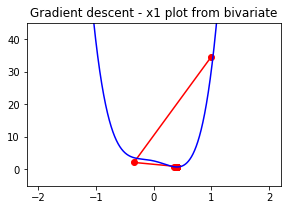

In [20]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.ylim([-5,45])
plt.title("Gradient descent - x1 plot from bivariate")

### 5.3) func = (x1-1)^2 + (x2-1)^2 + c*(x1^2 + x2^2 - 0.25)^2 and x0 = 1,-1 at c = 100
#### Notice this is a polynomial problem. Finding the Step size will be challenging as we cannot use Q anymore

In [21]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('2,-2')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')

# at C=100
fn = (x1-1)**2 + (x2-1)**2 + 100*(x1**2 + x2**2 - 0.25)**2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Define function to execute optimizes step size using line search
# Hardcoded due to shortage of time. Not good!!!!
def opt_func(x):
    return (x[0] - 1)**2 + (x[1] - 1)**2 + 100*(x[0]**2 + x[1]**2 - 0.25)**2

def grad(x):
    return [400*x[0]*(x[0]**2 + x[1]**2 - 0.25) + 2*x[0] - 2, 400*x[1]*(x[0]**2 + x[1]**2 - 0.25) + 2*x[1] - 2]

In [22]:
# Here step size will be calculated in a different way.
# Start at
x = np.matrix('1;-1')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = 0.00001
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for gradint descent
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * fprimeVal
    
    # Calculate step size
    # Use scipy line search function to find ideal step size.
    step = line_search(opt_func, grad, np.squeeze(np.asarray(xold)), np.squeeze(np.asarray(direction)))[0]
    
    # Calculate new x
    xnew = xold + step * direction
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)    
        print("Step Length: ",step)  
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[ 1]
 [-1]]


Iteration:  1
Direction:  [[-700.]
 [ 704.]]
Step Length:  0.00191347993345
New Value:  [[-0.33943595]
 [ 0.34708987]]




Iteration:  2
Direction:  [[ 0.73568885]
 [ 3.29282002]]
Step Length:  0.0161120766663
New Value:  [[-0.32758248]
 [ 0.40014404]]




Iteration:  3
Direction:  [[ 4.93848482]
 [-1.58937755]]
Step Length:  0.162890583952
New Value:  [[ 0.4768502]
 [ 0.1412494]]




Iteration:  4
Direction:  [[ 1.55414397]
 [ 1.86793148]]
Step Length:  0.00689329256587
New Value:  [[ 0.48756337]
 [ 0.1541256 ]]




Iteration:  5
Direction:  [[-1.21260153]
 [ 0.9844517 ]]
Step Length:  0.0166286561242
New Value:  [[ 0.46739943]
 [ 0.17049571]]




Iteration:  6
Direction:  [[ 1.52680146]
 [ 1.82738892]]
Step Length:  0.0063987817054
New Value:  [[ 0.4771691 ]
 [ 0.18218877]]




Iteration:  7
Direction:  [[-1.0315702 ]
 [ 0.84251085]]
Step Length:  0.0398006418328
New Value:  [[ 0.43611195]
 [ 0.21572125]]




Iteration:  8
Direction:  [[ 3.44

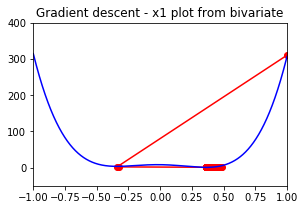

In [23]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.ylim([-50,400])
plt.xlim([-1,1])
plt.title("Gradient descent - x1 plot from bivariate")